### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN", "NAME","USE_CASE", "ASK_AMT"], inplace=True)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
ORGANIZATION               4
STATUS                     2
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
IS_SUCCESSFUL              2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df["APPLICATION_TYPE"].value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

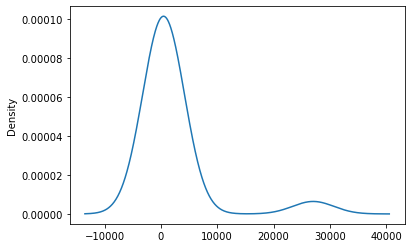

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_type.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type[application_type < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification = application_df["CLASSIFICATION"].value_counts()
classification[0:20]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

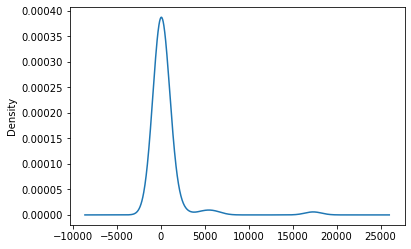

In [8]:
# Visualize the value counts of CLASSIFICATION
classification.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification[classification < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  32
hidden_nodes_layer2 = 16
hidden_nodes_layer3 = 2


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="tanh", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1216      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [18]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=500, callbacks=[cp_callback])

Epoch 1/500
 93/804 [==>...........................] - ETA: 1s - loss: 3.8878 - accuracy: 0.5073
Epoch 00001: saving model to checkpoints\weights.01.hdf5
196/804 [======>.......................] - ETA: 1s - loss: 3.5844 - accuracy: 0.5295
Epoch 00001: saving model to checkpoints\weights.01.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 3.2471 - accuracy: 0.5510
Epoch 00001: saving model to checkpoints\weights.01.hdf5
384/804 [=============>................] - ETA: 1s - loss: 2.9998 - accuracy: 0.5663
Epoch 00001: saving model to checkpoints\weights.01.hdf5
499/804 [=================>............] - ETA: 0s - loss: 2.7365 - accuracy: 0.5823
Epoch 00001: saving model to checkpoints\weights.01.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 2.5546 - accuracy: 0.5934
Epoch 00001: saving model to checkpoints\weights.01.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 2.4168 - accuracy: 0.6020
Epoch 00001: saving model to checkpoints\weights.01

573/804 [====================>.........] - ETA: 0s - loss: 0.6070 - accuracy: 0.6888
Epoch 00007: saving model to checkpoints\weights.07.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6081 - accuracy: 0.6880
Epoch 00007: saving model to checkpoints\weights.07.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6090 - accuracy: 0.6873
Epoch 00007: saving model to checkpoints\weights.07.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6094 - accuracy: 0.6870
Epoch 8/500
 69/804 [=>............................] - ETA: 1s - loss: 0.6281 - accuracy: 0.6746
Epoch 00008: saving model to checkpoints\weights.08.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.6271 - accuracy: 0.6740
Epoch 00008: saving model to checkpoints\weights.08.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.6263 - accuracy: 0.6745
Epoch 00008: saving model to checkpoints\weights.08.hdf5
362/804 [============>.................] - ETA:

131/804 [===>..........................] - ETA: 1s - loss: 0.5871 - accuracy: 0.7101
Epoch 00014: saving model to checkpoints\weights.14.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.5848 - accuracy: 0.7110
Epoch 00014: saving model to checkpoints\weights.14.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.5823 - accuracy: 0.7130
Epoch 00014: saving model to checkpoints\weights.14.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.5809 - accuracy: 0.7144
Epoch 00014: saving model to checkpoints\weights.14.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5799 - accuracy: 0.7155
Epoch 00014: saving model to checkpoints\weights.14.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5795 - accuracy: 0.7161 ETA: 0s - loss: 0.5795 - accuracy: 0.71
Epoch 00014: saving model to checkpoints\weights.14.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5793 - accuracy: 0.7167
Epoch 00014: saving mod

Epoch 00020: saving model to checkpoints\weights.20.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5602 - accuracy: 0.7363
Epoch 00020: saving model to checkpoints\weights.20.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5604 - accuracy: 0.7358
Epoch 00020: saving model to checkpoints\weights.20.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5605 - accuracy: 0.7355
Epoch 21/500
 16/804 [..............................] - ETA: 2s - loss: 0.5833 - accuracy: 0.7167
Epoch 00021: saving model to checkpoints\weights.21.hdf5
110/804 [===>..........................] - ETA: 2s - loss: 0.5626 - accuracy: 0.7308
Epoch 00021: saving model to checkpoints\weights.21.hdf5
204/804 [======>.......................] - ETA: 1s - loss: 0.5629 - accuracy: 0.7279 ETA: 2s - loss: 0.5634 - accuracy: 0.
Epoch 00021: saving model to checkpoints\weights.21.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 0.5629 - accuracy: 0.7271
Epoch 00

Epoch 00027: saving model to checkpoints\weights.27.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.5511 - accuracy: 0.7347 ETA: 1s - loss: 0.5505 - accuracy: 0.
Epoch 00027: saving model to checkpoints\weights.27.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.5518 - accuracy: 0.7352
Epoch 00027: saving model to checkpoints\weights.27.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.5521 - accuracy: 0.7355
Epoch 00027: saving model to checkpoints\weights.27.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5527 - accuracy: 0.7354
Epoch 00027: saving model to checkpoints\weights.27.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.5536 - accuracy: 0.7349
Epoch 00027: saving model to checkpoints\weights.27.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5541 - accuracy: 0.7347
Epoch 00027: saving model to checkpoints\weights.27.hdf5
791/804 [============================>.] - ETA: 0s - 

Epoch 00033: saving model to checkpoints\weights.33.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.5579 - accuracy: 0.7292
Epoch 00033: saving model to checkpoints\weights.33.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5572 - accuracy: 0.7298
Epoch 00033: saving model to checkpoints\weights.33.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5566 - accuracy: 0.7304
Epoch 00033: saving model to checkpoints\weights.33.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5564 - accuracy: 0.7306
Epoch 34/500
 59/804 [=>............................] - ETA: 4s - loss: 0.5425 - accuracy: 0.7380
Epoch 00034: saving model to checkpoints\weights.34.hdf5
167/804 [=====>........................] - ETA: 3s - loss: 0.5453 - accuracy: 0.7434
Epoch 00034: saving model to checkpoints\weights.34.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.5480 - accuracy: 0.7422
Epoch 00034: saving model to checkpoints\weigh

129/804 [===>..........................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7424
Epoch 00040: saving model to checkpoints\weights.40.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.5403 - accuracy: 0.7411
Epoch 00040: saving model to checkpoints\weights.40.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.5432 - accuracy: 0.7389
Epoch 00040: saving model to checkpoints\weights.40.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5451 - accuracy: 0.7372
Epoch 00040: saving model to checkpoints\weights.40.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5459 - accuracy: 0.7366
Epoch 00040: saving model to checkpoints\weights.40.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5462 - accuracy: 0.7363
Epoch 00040: saving model to checkpoints\weights.40.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5466 - accuracy: 0.7360
Epoch 00040: saving model to checkpoints\weights.40.hdf5
804/80

620/804 [======================>.......] - ETA: 0s - loss: 0.5534 - accuracy: 0.7317
Epoch 00046: saving model to checkpoints\weights.46.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5535 - accuracy: 0.7321
Epoch 00046: saving model to checkpoints\weights.46.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5535 - accuracy: 0.7328
Epoch 47/500
  1/804 [..............................] - ETA: 2s - loss: 0.5986 - accuracy: 0.5938
Epoch 00047: saving model to checkpoints\weights.47.hdf5
116/804 [===>..........................] - ETA: 1s - loss: 0.5382 - accuracy: 0.7422
Epoch 00047: saving model to checkpoints\weights.47.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.5477 - accuracy: 0.7404
Epoch 00047: saving model to checkpoints\weights.47.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.5545 - accuracy: 0.7390
Epoch 00047: saving model to checkpoints\weights.47.hdf5
405/804 [==============>...............] - ETA

 77/804 [=>............................] - ETA: 3s - loss: 0.5664 - accuracy: 0.7135
Epoch 00053: saving model to checkpoints\weights.53.hdf5
187/804 [=====>........................] - ETA: 2s - loss: 0.5597 - accuracy: 0.7226
Epoch 00053: saving model to checkpoints\weights.53.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 0.5562 - accuracy: 0.7266
Epoch 00053: saving model to checkpoints\weights.53.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.5535 - accuracy: 0.7290
Epoch 00053: saving model to checkpoints\weights.53.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5523 - accuracy: 0.7300
Epoch 00053: saving model to checkpoints\weights.53.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5517 - accuracy: 0.7307
Epoch 00053: saving model to checkpoints\weights.53.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5512 - accuracy: 0.7313
Epoch 00053: saving model to checkpoints\weights.53.hdf5
780/80

Epoch 00059: saving model to checkpoints\weights.59.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.5515 - accuracy: 0.7340
Epoch 00059: saving model to checkpoints\weights.59.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5508 - accuracy: 0.7346
Epoch 00059: saving model to checkpoints\weights.59.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5504 - accuracy: 0.7350
Epoch 00059: saving model to checkpoints\weights.59.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5503 - accuracy: 0.7351
Epoch 60/500
 56/804 [=>............................] - ETA: 3s - loss: 0.5373 - accuracy: 0.7351
Epoch 00060: saving model to checkpoints\weights.60.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5360 - accuracy: 0.7422
Epoch 00060: saving model to checkpoints\weights.60.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7409
Epoch 00060: saving model to checkpoints\weigh

133/804 [===>..........................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7471
Epoch 00066: saving model to checkpoints\weights.66.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 0.5348 - accuracy: 0.7443
Epoch 00066: saving model to checkpoints\weights.66.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.5371 - accuracy: 0.7425
Epoch 00066: saving model to checkpoints\weights.66.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.5393 - accuracy: 0.7414
Epoch 00066: saving model to checkpoints\weights.66.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.5405 - accuracy: 0.7408
Epoch 00066: saving model to checkpoints\weights.66.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5418 - accuracy: 0.7399
Epoch 00066: saving model to checkpoints\weights.66.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.5424 - accuracy: 0.7395
Epoch 00066: saving model to checkpoints\weights.66.hdf5
804/80

607/804 [=====================>........] - ETA: 0s - loss: 0.5562 - accuracy: 0.7312
Epoch 00072: saving model to checkpoints\weights.72.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5551 - accuracy: 0.7319
Epoch 00072: saving model to checkpoints\weights.72.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5542 - accuracy: 0.7325
Epoch 73/500
 11/804 [..............................] - ETA: 4s - loss: 0.4819 - accuracy: 0.7721
Epoch 00073: saving model to checkpoints\weights.73.hdf5
105/804 [==>...........................] - ETA: 3s - loss: 0.5413 - accuracy: 0.7391
Epoch 00073: saving model to checkpoints\weights.73.hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.5449 - accuracy: 0.7374
Epoch 00073: saving model to checkpoints\weights.73.hdf5
304/804 [==========>...................] - ETA: 2s - loss: 0.5466 - accuracy: 0.7361
Epoch 00073: saving model to checkpoints\weights.73.hdf5
405/804 [==============>...............] - ETA

Epoch 00079: saving model to checkpoints\weights.79.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 0.5559 - accuracy: 0.7331
Epoch 00079: saving model to checkpoints\weights.79.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.5552 - accuracy: 0.7339
Epoch 00079: saving model to checkpoints\weights.79.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.5541 - accuracy: 0.7348
Epoch 00079: saving model to checkpoints\weights.79.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.5530 - accuracy: 0.7356
Epoch 00079: saving model to checkpoints\weights.79.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5525 - accuracy: 0.7358
Epoch 00079: saving model to checkpoints\weights.79.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5521 - accuracy: 0.7360
Epoch 00079: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5519 - accuracy: 0.7360
Ep

763/804 [===========================>..] - ETA: 0s - loss: 0.5508 - accuracy: 0.7347
Epoch 00085: saving model to checkpoints\weights.85.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5506 - accuracy: 0.7348
Epoch 86/500
 53/804 [>.............................] - ETA: 2s - loss: 0.5281 - accuracy: 0.7415
Epoch 00086: saving model to checkpoints\weights.86.hdf5
152/804 [====>.........................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7405
Epoch 00086: saving model to checkpoints\weights.86.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.5414 - accuracy: 0.7387
Epoch 00086: saving model to checkpoints\weights.86.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.5437 - accuracy: 0.7375
Epoch 00086: saving model to checkpoints\weights.86.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.5445 - accuracy: 0.7373
Epoch 00086: saving model to checkpoints\weights.86.hdf5
551/804 [===================>..........] - ETA

327/804 [===========>..................] - ETA: 2s - loss: 0.5435 - accuracy: 0.7384
Epoch 00092: saving model to checkpoints\weights.92.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.5440 - accuracy: 0.7379
Epoch 00092: saving model to checkpoints\weights.92.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.5443 - accuracy: 0.7375
Epoch 00092: saving model to checkpoints\weights.92.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5446 - accuracy: 0.7371
Epoch 00092: saving model to checkpoints\weights.92.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5449 - accuracy: 0.7369
Epoch 00092: saving model to checkpoints\weights.92.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5450 - accuracy: 0.7369
Epoch 93/500
 24/804 [..............................] - ETA: 3s - loss: 0.5505 - accuracy: 0.7428
Epoch 00093: saving model to checkpoints\weights.93.hdf5
123/804 [===>..........................] - ETA

804/804 [==============================] - 4s 5ms/step - loss: 0.5431 - accuracy: 0.7372
Epoch 99/500
  1/804 [..............................] - ETA: 4s - loss: 0.4934 - accuracy: 0.7812
Epoch 00099: saving model to checkpoints\weights.99.hdf5
 98/804 [==>...........................] - ETA: 3s - loss: 0.5407 - accuracy: 0.7320
Epoch 00099: saving model to checkpoints\weights.99.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5450 - accuracy: 0.7330
Epoch 00099: saving model to checkpoints\weights.99.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.5455 - accuracy: 0.7339
Epoch 00099: saving model to checkpoints\weights.99.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.5460 - accuracy: 0.7340
Epoch 00099: saving model to checkpoints\weights.99.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.5460 - accuracy: 0.7343
Epoch 00099: saving model to checkpoints\weights.99.hdf5
607/804 [=====================>........] - ETA

374/804 [============>.................] - ETA: 2s - loss: 0.5470 - accuracy: 0.7352
Epoch 00105: saving model to checkpoints\weights.105.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5460 - accuracy: 0.7362
Epoch 00105: saving model to checkpoints\weights.105.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.5456 - accuracy: 0.7367
Epoch 00105: saving model to checkpoints\weights.105.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5455 - accuracy: 0.7370
Epoch 00105: saving model to checkpoints\weights.105.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5455 - accuracy: 0.7371
Epoch 00105: saving model to checkpoints\weights.105.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5455 - accuracy: 0.7372
Epoch 106/500
 71/804 [=>............................] - ETA: 3s - loss: 0.5280 - accuracy: 0.7471
Epoch 00106: saving model to checkpoints\weights.106.hdf5
177/804 [=====>........................

752/804 [===========================>..] - ETA: 0s - loss: 0.5360 - accuracy: 0.7425
Epoch 00111: saving model to checkpoints\weights.111.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5366 - accuracy: 0.7422
Epoch 112/500
 52/804 [>.............................] - ETA: 3s - loss: 0.5475 - accuracy: 0.7292
Epoch 00112: saving model to checkpoints\weights.112.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5521 - accuracy: 0.7277
Epoch 00112: saving model to checkpoints\weights.112.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5512 - accuracy: 0.7302
Epoch 00112: saving model to checkpoints\weights.112.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 0.5499 - accuracy: 0.7322
Epoch 00112: saving model to checkpoints\weights.112.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5486 - accuracy: 0.7339
Epoch 00112: saving model to checkpoints\weights.112.hdf5
548/804 [===================>..........

326/804 [===========>..................] - ETA: 2s - loss: 0.5409 - accuracy: 0.7397
Epoch 00118: saving model to checkpoints\weights.118.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7398
Epoch 00118: saving model to checkpoints\weights.118.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5416 - accuracy: 0.7394
Epoch 00118: saving model to checkpoints\weights.118.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5423 - accuracy: 0.7390
Epoch 00118: saving model to checkpoints\weights.118.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5426 - accuracy: 0.7388
Epoch 00118: saving model to checkpoints\weights.118.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5429 - accuracy: 0.7388
Epoch 119/500
 25/804 [..............................] - ETA: 3s - loss: 0.5319 - accuracy: 0.7632
Epoch 00119: saving model to checkpoints\weights.119.hdf5
126/804 [===>..........................

700/804 [=========================>....] - ETA: 0s - loss: 0.5513 - accuracy: 0.7350
Epoch 00124: saving model to checkpoints\weights.124.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5505 - accuracy: 0.7354
Epoch 125/500
  1/804 [..............................] - ETA: 4s - loss: 0.5244 - accuracy: 0.7500
Epoch 00125: saving model to checkpoints\weights.125.hdf5
102/804 [==>...........................] - ETA: 3s - loss: 0.5717 - accuracy: 0.7398
Epoch 00125: saving model to checkpoints\weights.125.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 0.5653 - accuracy: 0.7400
Epoch 00125: saving model to checkpoints\weights.125.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 0.5609 - accuracy: 0.7402
Epoch 00125: saving model to checkpoints\weights.125.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.5581 - accuracy: 0.7401
Epoch 00125: saving model to checkpoints\weights.125.hdf5
503/804 [=================>............

264/804 [========>.....................] - ETA: 1s - loss: 0.5415 - accuracy: 0.7448
Epoch 00131: saving model to checkpoints\weights.131.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7443
Epoch 00131: saving model to checkpoints\weights.131.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.5425 - accuracy: 0.7431
Epoch 00131: saving model to checkpoints\weights.131.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.5426 - accuracy: 0.7424 ETA: 0s - loss: 0.5426 - accuracy: 0.74
Epoch 00131: saving model to checkpoints\weights.131.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.5428 - accuracy: 0.7419
Epoch 00131: saving model to checkpoints\weights.131.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5429 - accuracy: 0.7415
Epoch 00131: saving model to checkpoints\weights.131.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5430 - accuracy: 0.7414
Epoch 132/500

649/804 [=======================>......] - ETA: 0s - loss: 0.5462 - accuracy: 0.7390
Epoch 00137: saving model to checkpoints\weights.137.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5458 - accuracy: 0.7391
Epoch 00137: saving model to checkpoints\weights.137.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5456 - accuracy: 0.7391
Epoch 138/500
 50/804 [>.............................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7380
Epoch 00138: saving model to checkpoints\weights.138.hdf5
144/804 [====>.........................] - ETA: 2s - loss: 0.5485 - accuracy: 0.7333
Epoch 00138: saving model to checkpoints\weights.138.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.5466 - accuracy: 0.7352
Epoch 00138: saving model to checkpoints\weights.138.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5450 - accuracy: 0.7370
Epoch 00138: saving model to checkpoints\weights.138.hdf5
442/804 [===============>..............

226/804 [=======>......................] - ETA: 1s - loss: 0.5463 - accuracy: 0.7428 ETA: 2s - loss: 0.5466 - accuracy: 
Epoch 00144: saving model to checkpoints\weights.144.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.5459 - accuracy: 0.7423
Epoch 00144: saving model to checkpoints\weights.144.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5457 - accuracy: 0.7415
Epoch 00144: saving model to checkpoints\weights.144.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 0.5454 - accuracy: 0.7411
Epoch 00144: saving model to checkpoints\weights.144.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5453 - accuracy: 0.7409
Epoch 00144: saving model to checkpoints\weights.144.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5453 - accuracy: 0.7407
Epoch 00144: saving model to checkpoints\weights.144.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5456 - accuracy: 0.7405
Epoch 145/500
 16

591/804 [=====================>........] - ETA: 0s - loss: 0.5418 - accuracy: 0.7460
Epoch 00150: saving model to checkpoints\weights.150.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5431 - accuracy: 0.7448
Epoch 00150: saving model to checkpoints\weights.150.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5439 - accuracy: 0.7440
Epoch 00150: saving model to checkpoints\weights.150.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5440 - accuracy: 0.7439
Epoch 151/500
 93/804 [==>...........................] - ETA: 2s - loss: 0.5713 - accuracy: 0.7296
Epoch 00151: saving model to checkpoints\weights.151.hdf5
186/804 [=====>........................] - ETA: 2s - loss: 0.5605 - accuracy: 0.7326
Epoch 00151: saving model to checkpoints\weights.151.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.5563 - accuracy: 0.7330
Epoch 00151: saving model to checkpoints\weights.151.hdf5
388/804 [=============>................

174/804 [=====>........................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7497
Epoch 00157: saving model to checkpoints\weights.157.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.5387 - accuracy: 0.7482
Epoch 00157: saving model to checkpoints\weights.157.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.5403 - accuracy: 0.7464
Epoch 00157: saving model to checkpoints\weights.157.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5410 - accuracy: 0.7454
Epoch 00157: saving model to checkpoints\weights.157.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.5415 - accuracy: 0.7446
Epoch 00157: saving model to checkpoints\weights.157.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.5417 - accuracy: 0.7441
Epoch 00157: saving model to checkpoints\weights.157.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5422 - accuracy: 0.7436
Epoch 00157: saving model to checkpoints\weights.157.hdf5

537/804 [===================>..........] - ETA: 0s - loss: 0.5441 - accuracy: 0.7402
Epoch 00163: saving model to checkpoints\weights.163.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5448 - accuracy: 0.7396
Epoch 00163: saving model to checkpoints\weights.163.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5453 - accuracy: 0.7394
Epoch 00163: saving model to checkpoints\weights.163.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5454 - accuracy: 0.7393
Epoch 164/500
 46/804 [>.............................] - ETA: 2s - loss: 0.5775 - accuracy: 0.7266
Epoch 00164: saving model to checkpoints\weights.164.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5650 - accuracy: 0.7304
Epoch 00164: saving model to checkpoints\weights.164.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.5586 - accuracy: 0.7328
Epoch 00164: saving model to checkpoints\weights.164.hdf5
333/804 [===========>..................

116/804 [===>..........................] - ETA: 1s - loss: 0.5248 - accuracy: 0.7520
Epoch 00170: saving model to checkpoints\weights.170.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.5265 - accuracy: 0.7509
Epoch 00170: saving model to checkpoints\weights.170.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.5294 - accuracy: 0.7490
Epoch 00170: saving model to checkpoints\weights.170.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.5310 - accuracy: 0.7479
Epoch 00170: saving model to checkpoints\weights.170.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.5330 - accuracy: 0.7467
Epoch 00170: saving model to checkpoints\weights.170.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5348 - accuracy: 0.7457
Epoch 00170: saving model to checkpoints\weights.170.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5362 - accuracy: 0.7448
Epoch 00170: saving model to checkpoints\weights.170.hdf5

594/804 [=====================>........] - ETA: 0s - loss: 0.5401 - accuracy: 0.7427
Epoch 00176: saving model to checkpoints\weights.176.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5406 - accuracy: 0.7423
Epoch 00176: saving model to checkpoints\weights.176.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5411 - accuracy: 0.7420
Epoch 00176: saving model to checkpoints\weights.176.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5412 - accuracy: 0.7420
Epoch 177/500
 83/804 [==>...........................] - ETA: 2s - loss: 0.5766 - accuracy: 0.7232
Epoch 00177: saving model to checkpoints\weights.177.hdf5
189/804 [======>.......................] - ETA: 1s - loss: 0.5671 - accuracy: 0.7280
Epoch 00177: saving model to checkpoints\weights.177.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.5623 - accuracy: 0.7304
Epoch 00177: saving model to checkpoints\weights.177.hdf5
382/804 [=============>................

154/804 [====>.........................] - ETA: 1s - loss: 0.5646 - accuracy: 0.7382
Epoch 00183: saving model to checkpoints\weights.183.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.5644 - accuracy: 0.7374
Epoch 00183: saving model to checkpoints\weights.183.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5628 - accuracy: 0.7377
Epoch 00183: saving model to checkpoints\weights.183.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.5621 - accuracy: 0.7379
Epoch 00183: saving model to checkpoints\weights.183.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5625 - accuracy: 0.7379
Epoch 00183: saving model to checkpoints\weights.183.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5626 - accuracy: 0.7380
Epoch 00183: saving model to checkpoints\weights.183.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5625 - accuracy: 0.7382
Epoch 00183: saving model to checkpoints\weights.183.hdf5

634/804 [======================>.......] - ETA: 0s - loss: 0.5379 - accuracy: 0.7460
Epoch 00189: saving model to checkpoints\weights.189.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5390 - accuracy: 0.7455
Epoch 00189: saving model to checkpoints\weights.189.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5397 - accuracy: 0.7450
Epoch 190/500
 37/804 [>.............................] - ETA: 2s - loss: 0.5577 - accuracy: 0.7282
Epoch 00190: saving model to checkpoints\weights.190.hdf5
137/804 [====>.........................] - ETA: 2s - loss: 0.5519 - accuracy: 0.7330
Epoch 00190: saving model to checkpoints\weights.190.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.5485 - accuracy: 0.7357
Epoch 00190: saving model to checkpoints\weights.190.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.5467 - accuracy: 0.7370
Epoch 00190: saving model to checkpoints\weights.190.hdf5
442/804 [===============>..............

220/804 [=======>......................] - ETA: 2s - loss: 0.5408 - accuracy: 0.7453
Epoch 00196: saving model to checkpoints\weights.196.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.5414 - accuracy: 0.7446
Epoch 00196: saving model to checkpoints\weights.196.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.5419 - accuracy: 0.7441
Epoch 00196: saving model to checkpoints\weights.196.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.5423 - accuracy: 0.7437
Epoch 00196: saving model to checkpoints\weights.196.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5428 - accuracy: 0.7433
Epoch 00196: saving model to checkpoints\weights.196.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5433 - accuracy: 0.7430
Epoch 00196: saving model to checkpoints\weights.196.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5438 - accuracy: 0.7427
Epoch 197/500
 16/804 [..............................

688/804 [========================>.....] - ETA: 0s - loss: 0.5580 - accuracy: 0.7412
Epoch 00202: saving model to checkpoints\weights.202.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5584 - accuracy: 0.7409
Epoch 00202: saving model to checkpoints\weights.202.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5585 - accuracy: 0.7409
Epoch 203/500
 83/804 [==>...........................] - ETA: 2s - loss: 0.5108 - accuracy: 0.7659
Epoch 00203: saving model to checkpoints\weights.203.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 0.5284 - accuracy: 0.7555
Epoch 00203: saving model to checkpoints\weights.203.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7524
Epoch 00203: saving model to checkpoints\weights.203.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7506
Epoch 00203: saving model to checkpoints\weights.203.hdf5
492/804 [=================>............

260/804 [========>.....................] - ETA: 1s - loss: 0.5767 - accuracy: 0.7447
Epoch 00209: saving model to checkpoints\weights.209.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5744 - accuracy: 0.7450
Epoch 00209: saving model to checkpoints\weights.209.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5729 - accuracy: 0.7449
Epoch 00209: saving model to checkpoints\weights.209.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5729 - accuracy: 0.7446
Epoch 00209: saving model to checkpoints\weights.209.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5733 - accuracy: 0.7441
Epoch 00209: saving model to checkpoints\weights.209.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5737 - accuracy: 0.7436
Epoch 00209: saving model to checkpoints\weights.209.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5740 - accuracy: 0.7434
Epoch 210/500
 62/804 [=>............................

Epoch 00215: saving model to checkpoints\weights.215.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6036 - accuracy: 0.7398
Epoch 00215: saving model to checkpoints\weights.215.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6038 - accuracy: 0.7397
Epoch 216/500
 22/804 [..............................] - ETA: 1s - loss: 0.5217 - accuracy: 0.7638
Epoch 00216: saving model to checkpoints\weights.216.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 0.5786 - accuracy: 0.7525
Epoch 00216: saving model to checkpoints\weights.216.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 0.5902 - accuracy: 0.7494
Epoch 00216: saving model to checkpoints\weights.216.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.5929 - accuracy: 0.7471
Epoch 00216: saving model to checkpoints\weights.216.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.5954 - accuracy: 0.7452
Epoch 00216: saving model to checkpoint

210/804 [======>.......................] - ETA: 2s - loss: 0.6317 - accuracy: 0.7267
Epoch 00222: saving model to checkpoints\weights.222.hdf5
307/804 [==========>...................] - ETA: 1s - loss: 0.6298 - accuracy: 0.7283
Epoch 00222: saving model to checkpoints\weights.222.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.6262 - accuracy: 0.7304
Epoch 00222: saving model to checkpoints\weights.222.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 0.6226 - accuracy: 0.7315
Epoch 00222: saving model to checkpoints\weights.222.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6203 - accuracy: 0.7324
Epoch 00222: saving model to checkpoints\weights.222.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6188 - accuracy: 0.7332
Epoch 00222: saving model to checkpoints\weights.222.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6174 - accuracy: 0.7338
Epoch 223/500
  1/804 [..............................

Epoch 00228: saving model to checkpoints\weights.228.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5700 - accuracy: 0.7428
Epoch 00228: saving model to checkpoints\weights.228.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5711 - accuracy: 0.7422
Epoch 00228: saving model to checkpoints\weights.228.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5712 - accuracy: 0.7422
Epoch 229/500
 82/804 [==>...........................] - ETA: 1s - loss: 0.5709 - accuracy: 0.7393
Epoch 00229: saving model to checkpoints\weights.229.hdf5
188/804 [======>.......................] - ETA: 1s - loss: 0.5682 - accuracy: 0.7404
Epoch 00229: saving model to checkpoints\weights.229.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.5671 - accuracy: 0.7402
Epoch 00229: saving model to checkpoints\weights.229.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5673 - accuracy: 0.7401
Epoch 00229: saving model to checkpoint

258/804 [========>.....................] - ETA: 1s - loss: 0.5747 - accuracy: 0.7368
Epoch 00235: saving model to checkpoints\weights.235.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5751 - accuracy: 0.7359
Epoch 00235: saving model to checkpoints\weights.235.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5753 - accuracy: 0.7357
Epoch 00235: saving model to checkpoints\weights.235.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5750 - accuracy: 0.7357
Epoch 00235: saving model to checkpoints\weights.235.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5742 - accuracy: 0.7358
Epoch 00235: saving model to checkpoints\weights.235.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5731 - accuracy: 0.7362
Epoch 00235: saving model to checkpoints\weights.235.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5726 - accuracy: 0.7364
Epoch 236/500
 55/804 [=>............................

Epoch 00241: saving model to checkpoints\weights.241.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5446 - accuracy: 0.7417
Epoch 00241: saving model to checkpoints\weights.241.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5449 - accuracy: 0.7414
Epoch 242/500
 19/804 [..............................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7558
Epoch 00242: saving model to checkpoints\weights.242.hdf5
131/804 [===>..........................] - ETA: 2s - loss: 0.5373 - accuracy: 0.7484
Epoch 00242: saving model to checkpoints\weights.242.hdf5
233/804 [=======>......................] - ETA: 1s - loss: 0.5409 - accuracy: 0.7450
Epoch 00242: saving model to checkpoints\weights.242.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.5432 - accuracy: 0.7432
Epoch 00242: saving model to checkpoints\weights.242.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.5450 - accuracy: 0.7420
Epoch 00242: saving model to checkpoint

Epoch 00248: saving model to checkpoints\weights.248.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 0.5767 - accuracy: 0.7401
Epoch 00248: saving model to checkpoints\weights.248.hdf5
395/804 [=============>................] - ETA: 1s - loss: 0.5755 - accuracy: 0.7394
Epoch 00248: saving model to checkpoints\weights.248.hdf5
496/804 [=================>............] - ETA: 0s - loss: 0.5738 - accuracy: 0.7393
Epoch 00248: saving model to checkpoints\weights.248.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5726 - accuracy: 0.7394
Epoch 00248: saving model to checkpoints\weights.248.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5720 - accuracy: 0.7397
Epoch 00248: saving model to checkpoints\weights.248.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5717 - accuracy: 0.7398
Epoch 249/500
  1/804 [..............................] - ETA: 3s - loss: 0.6210 - accuracy: 0.6875
Epoch 00249: saving model to checkpoint

665/804 [=======================>......] - ETA: 0s - loss: 0.5780 - accuracy: 0.7384
Epoch 00254: saving model to checkpoints\weights.254.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5773 - accuracy: 0.7386
Epoch 00254: saving model to checkpoints\weights.254.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5772 - accuracy: 0.7386
Epoch 255/500
 48/804 [>.............................] - ETA: 0s - loss: 0.6648 - accuracy: 0.7117
Epoch 00255: saving model to checkpoints\weights.255.hdf5
183/804 [=====>........................] - ETA: 0s - loss: 0.6195 - accuracy: 0.7270
Epoch 00255: saving model to checkpoints\weights.255.hdf5
248/804 [========>.....................] - ETA: 0s - loss: 0.6102 - accuracy: 0.7294
Epoch 00255: saving model to checkpoints\weights.255.hdf5
335/804 [===========>..................] - ETA: 0s - loss: 0.6017 - accuracy: 0.7317
Epoch 00255: saving model to checkpoints\weights.255.hdf5
468/804 [================>.............

224/804 [=======>......................] - ETA: 0s - loss: 0.5608 - accuracy: 0.7392
Epoch 00261: saving model to checkpoints\weights.261.hdf5
355/804 [============>.................] - ETA: 0s - loss: 0.5624 - accuracy: 0.7398
Epoch 00261: saving model to checkpoints\weights.261.hdf5
422/804 [==============>...............] - ETA: 0s - loss: 0.5632 - accuracy: 0.7397
Epoch 00261: saving model to checkpoints\weights.261.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5641 - accuracy: 0.7389
Epoch 00261: saving model to checkpoints\weights.261.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5644 - accuracy: 0.7388
Epoch 00261: saving model to checkpoints\weights.261.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5646 - accuracy: 0.7389
Epoch 00261: saving model to checkpoints\weights.261.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5647 - accuracy: 0.7389
Epoch 262/500
 41/804 [>.............................

699/804 [=========================>....] - ETA: 0s - loss: 0.5930 - accuracy: 0.7438
Epoch 00267: saving model to checkpoints\weights.267.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5931 - accuracy: 0.7435
Epoch 268/500
  1/804 [..............................] - ETA: 0s - loss: 0.4964 - accuracy: 0.7812
Epoch 00268: saving model to checkpoints\weights.268.hdf5
 89/804 [==>...........................] - ETA: 0s - loss: 0.6057 - accuracy: 0.7442
Epoch 00268: saving model to checkpoints\weights.268.hdf5
230/804 [=======>......................] - ETA: 0s - loss: 0.5980 - accuracy: 0.7399
Epoch 00268: saving model to checkpoints\weights.268.hdf5
304/804 [==========>...................] - ETA: 0s - loss: 0.5935 - accuracy: 0.7404
Epoch 00268: saving model to checkpoints\weights.268.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.5915 - accuracy: 0.7405
Epoch 00268: saving model to checkpoints\weights.268.hdf5
488/804 [=================>............

263/804 [========>.....................] - ETA: 0s - loss: 0.5781 - accuracy: 0.7404
Epoch 00274: saving model to checkpoints\weights.274.hdf5
407/804 [==============>...............] - ETA: 0s - loss: 0.5789 - accuracy: 0.7399
Epoch 00274: saving model to checkpoints\weights.274.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5792 - accuracy: 0.7398
Epoch 00274: saving model to checkpoints\weights.274.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.5795 - accuracy: 0.7395
Epoch 00274: saving model to checkpoints\weights.274.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5795 - accuracy: 0.7394
Epoch 00274: saving model to checkpoints\weights.274.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5791 - accuracy: 0.7394
Epoch 275/500
  1/804 [..............................] - ETA: 0s - loss: 0.9643 - accuracy: 0.6875
Epoch 00275: saving model to checkpoints\weights.275.hdf5
 71/804 [=>............................

735/804 [==========================>...] - ETA: 0s - loss: 0.5917 - accuracy: 0.7363
Epoch 00280: saving model to checkpoints\weights.280.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5918 - accuracy: 0.7366
Epoch 281/500
 52/804 [>.............................] - ETA: 0s - loss: 0.6030 - accuracy: 0.7213
Epoch 00281: saving model to checkpoints\weights.281.hdf5
149/804 [====>.........................] - ETA: 0s - loss: 0.6036 - accuracy: 0.7321
Epoch 00281: saving model to checkpoints\weights.281.hdf5
239/804 [=======>......................] - ETA: 0s - loss: 0.5995 - accuracy: 0.7369
Epoch 00281: saving model to checkpoints\weights.281.hdf5
333/804 [===========>..................] - ETA: 0s - loss: 0.5974 - accuracy: 0.7383
Epoch 00281: saving model to checkpoints\weights.281.hdf5
433/804 [===============>..............] - ETA: 0s - loss: 0.5960 - accuracy: 0.7387
Epoch 00281: saving model to checkpoints\weights.281.hdf5
532/804 [==================>...........

347/804 [===========>..................] - ETA: 0s - loss: 0.6106 - accuracy: 0.7421
Epoch 00287: saving model to checkpoints\weights.287.hdf5
436/804 [===============>..............] - ETA: 0s - loss: 0.6091 - accuracy: 0.7414
Epoch 00287: saving model to checkpoints\weights.287.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.6085 - accuracy: 0.7408
Epoch 00287: saving model to checkpoints\weights.287.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.6082 - accuracy: 0.7400
Epoch 00287: saving model to checkpoints\weights.287.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6071 - accuracy: 0.7394
Epoch 00287: saving model to checkpoints\weights.287.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.7394
Epoch 288/500
 52/804 [>.............................] - ETA: 0s - loss: 0.7108 - accuracy: 0.7323
Epoch 00288: saving model to checkpoints\weights.288.hdf5
146/804 [====>.........................

804/804 [==============================] - 1s 1ms/step - loss: 0.5856 - accuracy: 0.7427
Epoch 294/500
  1/804 [..............................] - ETA: 1s - loss: 0.4465 - accuracy: 0.7812
Epoch 00294: saving model to checkpoints\weights.294.hdf5
 93/804 [==>...........................] - ETA: 0s - loss: 0.5508 - accuracy: 0.7394
Epoch 00294: saving model to checkpoints\weights.294.hdf5
181/804 [=====>........................] - ETA: 0s - loss: 0.5509 - accuracy: 0.7421
Epoch 00294: saving model to checkpoints\weights.294.hdf5
279/804 [=========>....................] - ETA: 0s - loss: 0.5522 - accuracy: 0.7433
Epoch 00294: saving model to checkpoints\weights.294.hdf5
427/804 [==============>...............] - ETA: 0s - loss: 0.5543 - accuracy: 0.7433
Epoch 00294: saving model to checkpoints\weights.294.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.5553 - accuracy: 0.7430
Epoch 00294: saving model to checkpoints\weights.294.hdf5
580/804 [====================>.........

355/804 [============>.................] - ETA: 0s - loss: 0.5770 - accuracy: 0.7381
Epoch 00300: saving model to checkpoints\weights.300.hdf5
504/804 [=================>............] - ETA: 0s - loss: 0.5804 - accuracy: 0.7383
Epoch 00300: saving model to checkpoints\weights.300.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5811 - accuracy: 0.7384
Epoch 00300: saving model to checkpoints\weights.300.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5812 - accuracy: 0.7385
Epoch 00300: saving model to checkpoints\weights.300.hdf5
803/804 [============================>.] - ETA: 0s - loss: 0.5810 - accuracy: 0.7387
Epoch 00300: saving model to checkpoints\weights.300.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5810 - accuracy: 0.7387
Epoch 301/500
 51/804 [>.............................] - ETA: 0s - loss: 0.5628 - accuracy: 0.7323
Epoch 00301: saving model to checkpoints\weights.301.hdf5
152/804 [====>.........................

804/804 [==============================] - 1s 1ms/step - loss: 0.5865 - accuracy: 0.7391
Epoch 307/500
 48/804 [>.............................] - ETA: 0s - loss: 0.5853 - accuracy: 0.7370
Epoch 00307: saving model to checkpoints\weights.307.hdf5
140/804 [====>.........................] - ETA: 0s - loss: 0.5864 - accuracy: 0.7395
Epoch 00307: saving model to checkpoints\weights.307.hdf5
272/804 [=========>....................] - ETA: 0s - loss: 0.5911 - accuracy: 0.7379
Epoch 00307: saving model to checkpoints\weights.307.hdf5
334/804 [===========>..................] - ETA: 0s - loss: 0.5910 - accuracy: 0.7380
Epoch 00307: saving model to checkpoints\weights.307.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.5903 - accuracy: 0.7375
Epoch 00307: saving model to checkpoints\weights.307.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5891 - accuracy: 0.7375
Epoch 00307: saving model to checkpoints\weights.307.hdf5
627/804 [======================>.......

407/804 [==============>...............] - ETA: 0s - loss: 0.5703 - accuracy: 0.7503
Epoch 00313: saving model to checkpoints\weights.313.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5717 - accuracy: 0.7484
Epoch 00313: saving model to checkpoints\weights.313.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5720 - accuracy: 0.7473
Epoch 00313: saving model to checkpoints\weights.313.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.5724 - accuracy: 0.7467
Epoch 00313: saving model to checkpoints\weights.313.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5732 - accuracy: 0.7460
Epoch 314/500
  1/804 [..............................] - ETA: 0s - loss: 0.6710 - accuracy: 0.6875
Epoch 00314: saving model to checkpoints\weights.314.hdf5
102/804 [==>...........................] - ETA: 0s - loss: 0.6020 - accuracy: 0.7517
Epoch 00314: saving model to checkpoints\weights.314.hdf5
198/804 [======>.......................

  1/804 [..............................] - ETA: 0s - loss: 0.5629 - accuracy: 0.7812
Epoch 00320: saving model to checkpoints\weights.320.hdf5
 97/804 [==>...........................] - ETA: 0s - loss: 0.6176 - accuracy: 0.7189
Epoch 00320: saving model to checkpoints\weights.320.hdf5
184/804 [=====>........................] - ETA: 0s - loss: 0.6078 - accuracy: 0.7232
Epoch 00320: saving model to checkpoints\weights.320.hdf5
278/804 [=========>....................] - ETA: 0s - loss: 0.6004 - accuracy: 0.7264
Epoch 00320: saving model to checkpoints\weights.320.hdf5
379/804 [=============>................] - ETA: 0s - loss: 0.5954 - accuracy: 0.7284
Epoch 00320: saving model to checkpoints\weights.320.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.5922 - accuracy: 0.7298
Epoch 00320: saving model to checkpoints\weights.320.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.5900 - accuracy: 0.7310
Epoch 00320: saving model to checkpoints\weights.320.hdf5

467/804 [================>.............] - ETA: 0s - loss: 0.5806 - accuracy: 0.7406
Epoch 00326: saving model to checkpoints\weights.326.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5804 - accuracy: 0.7405
Epoch 00326: saving model to checkpoints\weights.326.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.5802 - accuracy: 0.7404
Epoch 00326: saving model to checkpoints\weights.326.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5804 - accuracy: 0.7400
Epoch 00326: saving model to checkpoints\weights.326.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5804 - accuracy: 0.7400
Epoch 327/500
 94/804 [==>...........................] - ETA: 0s - loss: 0.5535 - accuracy: 0.7506
Epoch 00327: saving model to checkpoints\weights.327.hdf5
167/804 [=====>........................] - ETA: 0s - loss: 0.5633 - accuracy: 0.7473
Epoch 00327: saving model to checkpoints\weights.327.hdf5
288/804 [=========>....................

 49/804 [>.............................] - ETA: 0s - loss: 0.6861 - accuracy: 0.7231
Epoch 00333: saving model to checkpoints\weights.333.hdf5
130/804 [===>..........................] - ETA: 0s - loss: 0.6492 - accuracy: 0.7268
Epoch 00333: saving model to checkpoints\weights.333.hdf5
223/804 [=======>......................] - ETA: 0s - loss: 0.6400 - accuracy: 0.7288
Epoch 00333: saving model to checkpoints\weights.333.hdf5
371/804 [============>.................] - ETA: 0s - loss: 0.6350 - accuracy: 0.7303
Epoch 00333: saving model to checkpoints\weights.333.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 0.6328 - accuracy: 0.7316
Epoch 00333: saving model to checkpoints\weights.333.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 0.6311 - accuracy: 0.7326
Epoch 00333: saving model to checkpoints\weights.333.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6285 - accuracy: 0.7338
Epoch 00333: saving model to checkpoints\weights.333.hdf5

542/804 [===================>..........] - ETA: 0s - loss: 0.6146 - accuracy: 0.7342
Epoch 00339: saving model to checkpoints\weights.339.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6134 - accuracy: 0.7347
Epoch 00339: saving model to checkpoints\weights.339.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6126 - accuracy: 0.7353
Epoch 00339: saving model to checkpoints\weights.339.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6121 - accuracy: 0.7357
Epoch 340/500
 24/804 [..............................] - ETA: 1s - loss: 0.5816 - accuracy: 0.7629
Epoch 00340: saving model to checkpoints\weights.340.hdf5
132/804 [===>..........................] - ETA: 1s - loss: 0.5812 - accuracy: 0.7422
Epoch 00340: saving model to checkpoints\weights.340.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.5860 - accuracy: 0.7392 ETA: 1s - loss: 0.5830 - accuracy: 
Epoch 00340: saving model to checkpoints\weights.340.hdf5
332

113/804 [===>..........................] - ETA: 2s - loss: 0.5984 - accuracy: 0.7260
Epoch 00346: saving model to checkpoints\weights.346.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.6026 - accuracy: 0.7322
Epoch 00346: saving model to checkpoints\weights.346.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.6077 - accuracy: 0.7338
Epoch 00346: saving model to checkpoints\weights.346.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.6134 - accuracy: 0.7347
Epoch 00346: saving model to checkpoints\weights.346.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.6174 - accuracy: 0.7351
Epoch 00346: saving model to checkpoints\weights.346.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.6199 - accuracy: 0.7355
Epoch 00346: saving model to checkpoints\weights.346.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6219 - accuracy: 0.7360
Epoch 00346: saving model to checkpoints\weights.346.hdf5

Epoch 00352: saving model to checkpoints\weights.352.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.6308 - accuracy: 0.7410
Epoch 00352: saving model to checkpoints\weights.352.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6289 - accuracy: 0.7411
Epoch 00352: saving model to checkpoints\weights.352.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6280 - accuracy: 0.7410
Epoch 00352: saving model to checkpoints\weights.352.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6279 - accuracy: 0.7410
Epoch 353/500
 86/804 [==>...........................] - ETA: 2s - loss: 0.6226 - accuracy: 0.7374
Epoch 00353: saving model to checkpoints\weights.353.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.6289 - accuracy: 0.7357
Epoch 00353: saving model to checkpoints\weights.353.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.6240 - accuracy: 0.7364
Epoch 00353: saving model to checkpoint

 54/804 [=>............................] - ETA: 2s - loss: 0.6003 - accuracy: 0.7626
Epoch 00359: saving model to checkpoints\weights.359.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.6233 - accuracy: 0.7519
Epoch 00359: saving model to checkpoints\weights.359.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.6253 - accuracy: 0.7493
Epoch 00359: saving model to checkpoints\weights.359.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.6304 - accuracy: 0.7478
Epoch 00359: saving model to checkpoints\weights.359.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.6330 - accuracy: 0.7466
Epoch 00359: saving model to checkpoints\weights.359.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.6357 - accuracy: 0.7455
Epoch 00359: saving model to checkpoints\weights.359.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6374 - accuracy: 0.7448
Epoch 00359: saving model to checkpoints\weights.359.hdf5

Epoch 00365: saving model to checkpoints\weights.365.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.6519 - accuracy: 0.7343
Epoch 00365: saving model to checkpoints\weights.365.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.6539 - accuracy: 0.7348
Epoch 00365: saving model to checkpoints\weights.365.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6574 - accuracy: 0.7353
Epoch 00365: saving model to checkpoints\weights.365.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6605 - accuracy: 0.7356
Epoch 366/500
 26/804 [..............................] - ETA: 1s - loss: 0.7330 - accuracy: 0.7457
Epoch 00366: saving model to checkpoints\weights.366.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.8309 - accuracy: 0.7407
Epoch 00366: saving model to checkpoints\weights.366.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 0.8424 - accuracy: 0.7399
Epoch 00366: saving model to checkpoint

Epoch 00372: saving model to checkpoints\weights.372.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.8455 - accuracy: 0.7281
Epoch 00372: saving model to checkpoints\weights.372.hdf5
207/804 [======>.......................] - ETA: 1s - loss: 0.8689 - accuracy: 0.7304
Epoch 00372: saving model to checkpoints\weights.372.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.8755 - accuracy: 0.7308
Epoch 00372: saving model to checkpoints\weights.372.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.8760 - accuracy: 0.7306
Epoch 00372: saving model to checkpoints\weights.372.hdf5
502/804 [=================>............] - ETA: 0s - loss: 0.8742 - accuracy: 0.7308
Epoch 00372: saving model to checkpoints\weights.372.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.8688 - accuracy: 0.7314
Epoch 00372: saving model to checkpoints\weights.372.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.8613 - accuracy: 0.7320

486/804 [=================>............] - ETA: 1s - loss: 0.6378 - accuracy: 0.7381
Epoch 00378: saving model to checkpoints\weights.378.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.6348 - accuracy: 0.7385 ETA: 1s - loss: 0.6359 - accuracy: 
Epoch 00378: saving model to checkpoints\weights.378.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6321 - accuracy: 0.7389
Epoch 00378: saving model to checkpoints\weights.378.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6304 - accuracy: 0.7391
Epoch 00378: saving model to checkpoints\weights.378.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6300 - accuracy: 0.7391
Epoch 379/500
 73/804 [=>............................] - ETA: 2s - loss: 0.6276 - accuracy: 0.7299
Epoch 00379: saving model to checkpoints\weights.379.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 0.6278 - accuracy: 0.7357
Epoch 00379: saving model to checkpoints\weights.379.hdf5
284

804/804 [==============================] - 3s 4ms/step - loss: 0.6180 - accuracy: 0.7420
Epoch 385/500
 57/804 [=>............................] - ETA: 2s - loss: 0.6198 - accuracy: 0.7594
Epoch 00385: saving model to checkpoints\weights.385.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.6103 - accuracy: 0.7495
Epoch 00385: saving model to checkpoints\weights.385.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.6118 - accuracy: 0.7455
Epoch 00385: saving model to checkpoints\weights.385.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.6136 - accuracy: 0.7432
Epoch 00385: saving model to checkpoints\weights.385.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.6148 - accuracy: 0.7421
Epoch 00385: saving model to checkpoints\weights.385.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.6154 - accuracy: 0.7416
Epoch 00385: saving model to checkpoints\weights.385.hdf5
653/804 [=======================>......

432/804 [===============>..............] - ETA: 1s - loss: 0.6376 - accuracy: 0.7451
Epoch 00391: saving model to checkpoints\weights.391.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.6356 - accuracy: 0.7450
Epoch 00391: saving model to checkpoints\weights.391.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6343 - accuracy: 0.7447
Epoch 00391: saving model to checkpoints\weights.391.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6331 - accuracy: 0.7443
Epoch 00391: saving model to checkpoints\weights.391.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6325 - accuracy: 0.7439
Epoch 392/500
 31/804 [>.............................] - ETA: 2s - loss: 0.6191 - accuracy: 0.7405
Epoch 00392: saving model to checkpoints\weights.392.hdf5
126/804 [===>..........................] - ETA: 2s - loss: 0.6352 - accuracy: 0.7409
Epoch 00392: saving model to checkpoints\weights.392.hdf5
222/804 [=======>......................

804/804 [==============================] - 3s 4ms/step - loss: 0.6248 - accuracy: 0.7447
Epoch 398/500
  1/804 [..............................] - ETA: 3s - loss: 0.9507 - accuracy: 0.7500
Epoch 00398: saving model to checkpoints\weights.398.hdf5
110/804 [===>..........................] - ETA: 2s - loss: 0.6641 - accuracy: 0.7340
Epoch 00398: saving model to checkpoints\weights.398.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.6609 - accuracy: 0.7347
Epoch 00398: saving model to checkpoints\weights.398.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.6538 - accuracy: 0.7380
Epoch 00398: saving model to checkpoints\weights.398.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.6486 - accuracy: 0.7396
Epoch 00398: saving model to checkpoints\weights.398.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.6456 - accuracy: 0.7399
Epoch 00398: saving model to checkpoints\weights.398.hdf5
594/804 [=====================>........

386/804 [=============>................] - ETA: 1s - loss: 0.6506 - accuracy: 0.7463
Epoch 00404: saving model to checkpoints\weights.404.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.6515 - accuracy: 0.7455
Epoch 00404: saving model to checkpoints\weights.404.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.6531 - accuracy: 0.7443
Epoch 00404: saving model to checkpoints\weights.404.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6544 - accuracy: 0.7435
Epoch 00404: saving model to checkpoints\weights.404.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6554 - accuracy: 0.7431
Epoch 00404: saving model to checkpoints\weights.404.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6557 - accuracy: 0.7430
Epoch 405/500
 71/804 [=>............................] - ETA: 2s - loss: 0.6750 - accuracy: 0.7198
Epoch 00405: saving model to checkpoints\weights.405.hdf5
172/804 [=====>........................

755/804 [===========================>..] - ETA: 0s - loss: 0.6506 - accuracy: 0.7421
Epoch 00410: saving model to checkpoints\weights.410.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6513 - accuracy: 0.7420
Epoch 411/500
 52/804 [>.............................] - ETA: 3s - loss: 0.6508 - accuracy: 0.7528
Epoch 00411: saving model to checkpoints\weights.411.hdf5
152/804 [====>.........................] - ETA: 3s - loss: 0.6506 - accuracy: 0.7468
Epoch 00411: saving model to checkpoints\weights.411.hdf5
259/804 [========>.....................] - ETA: 2s - loss: 0.6465 - accuracy: 0.7457
Epoch 00411: saving model to checkpoints\weights.411.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 0.6447 - accuracy: 0.7449
Epoch 00411: saving model to checkpoints\weights.411.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6467 - accuracy: 0.7440
Epoch 00411: saving model to checkpoints\weights.411.hdf5
549/804 [===================>..........

314/804 [==========>...................] - ETA: 2s - loss: 0.6910 - accuracy: 0.7448
Epoch 00417: saving model to checkpoints\weights.417.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.6856 - accuracy: 0.7439
Epoch 00417: saving model to checkpoints\weights.417.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.6811 - accuracy: 0.7431
Epoch 00417: saving model to checkpoints\weights.417.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.6790 - accuracy: 0.7423
Epoch 00417: saving model to checkpoints\weights.417.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6777 - accuracy: 0.7419
Epoch 00417: saving model to checkpoints\weights.417.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6766 - accuracy: 0.7416
Epoch 418/500
 27/804 [>.............................] - ETA: 1s - loss: 0.7105 - accuracy: 0.7340
Epoch 00418: saving model to checkpoints\weights.418.hdf5
124/804 [===>..........................

698/804 [=========================>....] - ETA: 0s - loss: 0.6836 - accuracy: 0.7363
Epoch 00423: saving model to checkpoints\weights.423.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6846 - accuracy: 0.7365
Epoch 424/500
  1/804 [..............................] - ETA: 2s - loss: 0.8301 - accuracy: 0.8750
Epoch 00424: saving model to checkpoints\weights.424.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 0.6462 - accuracy: 0.7540
Epoch 00424: saving model to checkpoints\weights.424.hdf5
207/804 [======>.......................] - ETA: 1s - loss: 0.6388 - accuracy: 0.7533
Epoch 00424: saving model to checkpoints\weights.424.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6370 - accuracy: 0.7521
Epoch 00424: saving model to checkpoints\weights.424.hdf5
395/804 [=============>................] - ETA: 1s - loss: 0.6383 - accuracy: 0.7500
Epoch 00424: saving model to checkpoints\weights.424.hdf5
494/804 [=================>............

281/804 [=========>....................] - ETA: 1s - loss: 0.5888 - accuracy: 0.7401
Epoch 00430: saving model to checkpoints\weights.430.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.5860 - accuracy: 0.7400
Epoch 00430: saving model to checkpoints\weights.430.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.5838 - accuracy: 0.7406
Epoch 00430: saving model to checkpoints\weights.430.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.5821 - accuracy: 0.7410
Epoch 00430: saving model to checkpoints\weights.430.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5810 - accuracy: 0.7411
Epoch 00430: saving model to checkpoints\weights.430.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5803 - accuracy: 0.7409
Epoch 00430: saving model to checkpoints\weights.430.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5802 - accuracy: 0.7409
Epoch 431/500
 67/804 [=>............................

748/804 [==========================>...] - ETA: 0s - loss: 0.5583 - accuracy: 0.7455
Epoch 00436: saving model to checkpoints\weights.436.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5595 - accuracy: 0.7451
Epoch 437/500
 45/804 [>.............................] - ETA: 1s - loss: 0.6066 - accuracy: 0.7267
Epoch 00437: saving model to checkpoints\weights.437.hdf5
146/804 [====>.........................] - ETA: 1s - loss: 0.5936 - accuracy: 0.7360
Epoch 00437: saving model to checkpoints\weights.437.hdf5
252/804 [========>.....................] - ETA: 1s - loss: 0.5851 - accuracy: 0.7375
Epoch 00437: saving model to checkpoints\weights.437.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.5808 - accuracy: 0.7381
Epoch 00437: saving model to checkpoints\weights.437.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.5779 - accuracy: 0.7388
Epoch 00437: saving model to checkpoints\weights.437.hdf5
556/804 [===================>..........

314/804 [==========>...................] - ETA: 1s - loss: 0.5802 - accuracy: 0.7274
Epoch 00443: saving model to checkpoints\weights.443.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.5807 - accuracy: 0.7299
Epoch 00443: saving model to checkpoints\weights.443.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.5813 - accuracy: 0.7317
Epoch 00443: saving model to checkpoints\weights.443.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5828 - accuracy: 0.7328
Epoch 00443: saving model to checkpoints\weights.443.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5844 - accuracy: 0.7336
Epoch 00443: saving model to checkpoints\weights.443.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5856 - accuracy: 0.7342
Epoch 444/500
 22/804 [..............................] - ETA: 1s - loss: 0.4871 - accuracy: 0.7604
Epoch 00444: saving model to checkpoints\weights.444.hdf5
115/804 [===>..........................

697/804 [=========================>....] - ETA: 0s - loss: 0.5843 - accuracy: 0.7460
Epoch 00449: saving model to checkpoints\weights.449.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5872 - accuracy: 0.7452
Epoch 450/500
  1/804 [..............................] - ETA: 1s - loss: 0.5445 - accuracy: 0.6875
Epoch 00450: saving model to checkpoints\weights.450.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.6483 - accuracy: 0.7495
Epoch 00450: saving model to checkpoints\weights.450.hdf5
204/804 [======>.......................] - ETA: 1s - loss: 0.6563 - accuracy: 0.7438
Epoch 00450: saving model to checkpoints\weights.450.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.6574 - accuracy: 0.7426
Epoch 00450: saving model to checkpoints\weights.450.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.6574 - accuracy: 0.7428
Epoch 00450: saving model to checkpoints\weights.450.hdf5
492/804 [=================>............

277/804 [=========>....................] - ETA: 1s - loss: 0.6872 - accuracy: 0.7375
Epoch 00456: saving model to checkpoints\weights.456.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.6844 - accuracy: 0.7380
Epoch 00456: saving model to checkpoints\weights.456.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.6820 - accuracy: 0.7384
Epoch 00456: saving model to checkpoints\weights.456.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.6789 - accuracy: 0.7387
Epoch 00456: saving model to checkpoints\weights.456.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6762 - accuracy: 0.7388
Epoch 00456: saving model to checkpoints\weights.456.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6747 - accuracy: 0.7389
Epoch 00456: saving model to checkpoints\weights.456.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6743 - accuracy: 0.7389
Epoch 457/500
 67/804 [=>............................

743/804 [==========================>...] - ETA: 0s - loss: 0.6523 - accuracy: 0.7413
Epoch 00462: saving model to checkpoints\weights.462.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6526 - accuracy: 0.7412
Epoch 463/500
 44/804 [>.............................] - ETA: 2s - loss: 0.6423 - accuracy: 0.7381
Epoch 00463: saving model to checkpoints\weights.463.hdf5
138/804 [====>.........................] - ETA: 2s - loss: 0.6315 - accuracy: 0.7420
Epoch 00463: saving model to checkpoints\weights.463.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.6393 - accuracy: 0.7414
Epoch 00463: saving model to checkpoints\weights.463.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.6457 - accuracy: 0.7402
Epoch 00463: saving model to checkpoints\weights.463.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.6484 - accuracy: 0.7397
Epoch 00463: saving model to checkpoints\weights.463.hdf5
544/804 [===================>..........

Epoch 00469: saving model to checkpoints\weights.469.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.6801 - accuracy: 0.7428
Epoch 00469: saving model to checkpoints\weights.469.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.6821 - accuracy: 0.7423
Epoch 00469: saving model to checkpoints\weights.469.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 0.6828 - accuracy: 0.7423
Epoch 00469: saving model to checkpoints\weights.469.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.6843 - accuracy: 0.7421
Epoch 00469: saving model to checkpoints\weights.469.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6857 - accuracy: 0.7418
Epoch 00469: saving model to checkpoints\weights.469.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6860 - accuracy: 0.7416: 0s - loss: 0.6861 - accuracy: 0.74
Epoch 470/500
 24/804 [..............................] - ETA: 1s - loss: 0.8598 - accuracy: 0.7231
Epo

704/804 [=========================>....] - ETA: 0s - loss: 0.6630 - accuracy: 0.7408
Epoch 00475: saving model to checkpoints\weights.475.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6632 - accuracy: 0.7407
Epoch 00475: saving model to checkpoints\weights.475.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6633 - accuracy: 0.7407
Epoch 476/500
 86/804 [==>...........................] - ETA: 1s - loss: 0.6780 - accuracy: 0.7536
Epoch 00476: saving model to checkpoints\weights.476.hdf5
190/804 [======>.......................] - ETA: 1s - loss: 0.6680 - accuracy: 0.7502
Epoch 00476: saving model to checkpoints\weights.476.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.6640 - accuracy: 0.7496
Epoch 00476: saving model to checkpoints\weights.476.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.6631 - accuracy: 0.7479
Epoch 00476: saving model to checkpoints\weights.476.hdf5
491/804 [=================>............

257/804 [========>.....................] - ETA: 1s - loss: 0.6983 - accuracy: 0.7416
Epoch 00482: saving model to checkpoints\weights.482.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.6922 - accuracy: 0.7407
Epoch 00482: saving model to checkpoints\weights.482.hdf5
467/804 [================>.............] - ETA: 0s - loss: 0.6875 - accuracy: 0.7402
Epoch 00482: saving model to checkpoints\weights.482.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.6842 - accuracy: 0.7399
Epoch 00482: saving model to checkpoints\weights.482.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6822 - accuracy: 0.7397
Epoch 00482: saving model to checkpoints\weights.482.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6805 - accuracy: 0.7397
Epoch 00482: saving model to checkpoints\weights.482.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6799 - accuracy: 0.7397
Epoch 483/500
 65/804 [=>............................

Epoch 00488: saving model to checkpoints\weights.488.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6659 - accuracy: 0.7416
Epoch 00488: saving model to checkpoints\weights.488.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6659 - accuracy: 0.7414
Epoch 489/500
 43/804 [>.............................] - ETA: 1s - loss: 0.6036 - accuracy: 0.7597
Epoch 00489: saving model to checkpoints\weights.489.hdf5
132/804 [===>..........................] - ETA: 1s - loss: 0.6102 - accuracy: 0.7446
Epoch 00489: saving model to checkpoints\weights.489.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 0.6217 - accuracy: 0.7402
Epoch 00489: saving model to checkpoints\weights.489.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.6290 - accuracy: 0.7392
Epoch 00489: saving model to checkpoints\weights.489.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.6333 - accuracy: 0.7386
Epoch 00489: saving model to checkpoint

224/804 [=======>......................] - ETA: 2s - loss: 0.7451 - accuracy: 0.7379
Epoch 00495: saving model to checkpoints\weights.495.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.7349 - accuracy: 0.7388
Epoch 00495: saving model to checkpoints\weights.495.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.7240 - accuracy: 0.7396
Epoch 00495: saving model to checkpoints\weights.495.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.7184 - accuracy: 0.7402
Epoch 00495: saving model to checkpoints\weights.495.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.7159 - accuracy: 0.7402
Epoch 00495: saving model to checkpoints\weights.495.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.7149 - accuracy: 0.7400
Epoch 00495: saving model to checkpoints\weights.495.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.7142 - accuracy: 0.7399
Epoch 496/500
 15/804 [..............................

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.7897 - accuracy: 0.7230
Loss: 0.7896659970283508, Accuracy: 0.7230320572853088


<AxesSubplot:>

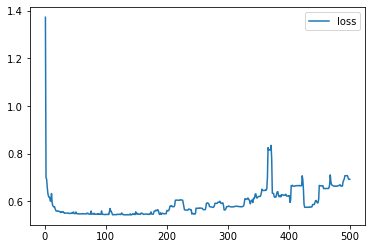

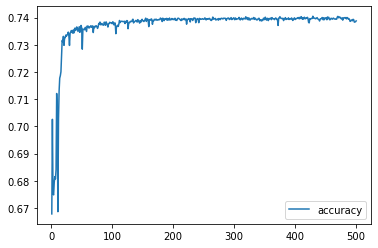

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

# Plot the accuracy
history_df.plot(y="accuracy")

In [22]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

### Attempt 1

Added additional hidden layers (4 in total) with additional neurons. I tried various activation layers with the original data and never was able to get over 73% Accuracy.

### Attempt 2

Removed other columns and adjusted different neurons across three hidden layers. Tried rebucketing some of our data.

### Attempt 3

Running 500 epochs